# Question-1
# Nicel verileri describe methodu ile inceleyiniz ve verileri ortalaması, standart sapması ve çeyrekliklerine bakarak aykırılık olup olmadığını ve normal dağılıp dağılmadığı konusunda yorumda bulunun.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
titanic= sns.load_dataset('titanic')
df = titanic.copy()
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
df.describe().T
# df.sample(5)

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [3]:
import scipy.stats as stats
stats.describe(df.survived)

DescribeResult(nobs=891, minmax=(0, 1), mean=0.3838383838383838, variance=0.23677221654749742, skewness=0.4777174662568536, kurtosis=-1.7717860224331319)

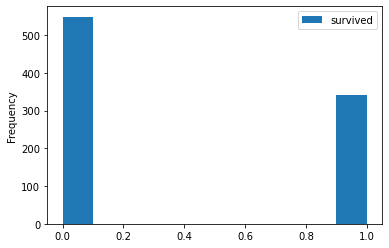

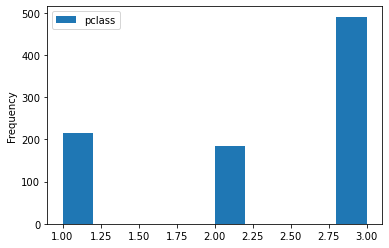

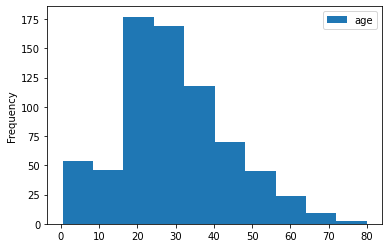

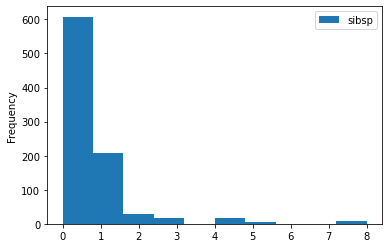

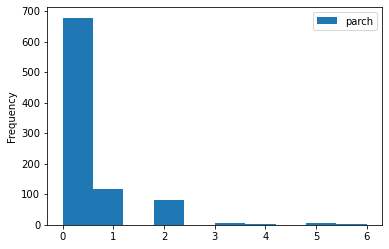

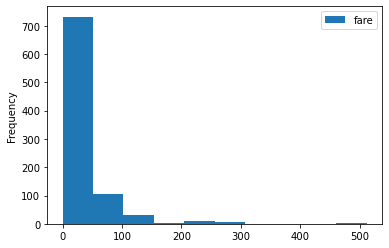

In [4]:
pd.DataFrame(df.survived).plot.hist();
pd.DataFrame(df.pclass).plot.hist();
pd.DataFrame(df.age).plot.hist();
pd.DataFrame(df.sibsp).plot.hist();
pd.DataFrame(df.parch).plot.hist();
pd.DataFrame(df.fare).plot.hist();

#sibsp, parch and fare have outliers, others not. And none of the columns seems to have normal distribution.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [8]:
a = df.select_dtypes(include='bool')
a.head()

,adult_male,alone
0,True,False
1,False,False
2,False,True
3,False,False
4,True,True


# Question-2
# Nitel verilerin dtypelarıını kategorik yapın. Sıralanabilecek kategorik değişkenlerin sıralı olarak belirleyiniz. Sıralanmış kategorik verilerin sıralaması doğru değilse sıralamayı uygun hale getirin.


In [7]:
from pandas.api.types import CategoricalDtype
# df.cut = df.cut.astype(CategoricalDtype(ordered = True))

In [8]:
df_object = df.select_dtypes(include=object)
df.sex = df.sex.astype(CategoricalDtype(ordered = False))
df.who = df.who.astype(CategoricalDtype(ordered = False))
df['class'] = df['class'].astype(CategoricalDtype(ordered = True))
df.embark_town = df.embark_town.astype(CategoricalDtype(ordered = False))
df.embarked = df.embarked.astype(CategoricalDtype(ordered = False))
df.deck = df.deck.astype(CategoricalDtype(ordered = False))
df.alive = df.alive.astype(CategoricalDtype(ordered = False))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    category
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    category
 8   class        891 non-null    category
 9   who          891 non-null    category
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    category
 13  alive        891 non-null    category
 14  alone        891 non-null    bool    
dtypes: bool(2), category(7), float64(2), int64(4)
memory usage: 50.7 KB


In [9]:
print(df.sex.head())
print(df.embarked.head())
print(df['class'].head())
print(df.who.head())
print(df.deck.tail())
print(df.embark_town.head())
print(df.alive.head())


0      male
1    female
2    female
3    female
4      male
Name: sex, dtype: category
Categories (2, object): ['female', 'male']
0    S
1    C
2    S
3    S
4    S
Name: embarked, dtype: category
Categories (3, object): ['C', 'Q', 'S']
0    Third
1    First
2    Third
3    First
4    Third
Name: class, dtype: category
Categories (3, object): ['First' < 'Second' < 'Third']
0      man
1    woman
2    woman
3    woman
4      man
Name: who, dtype: category
Categories (3, object): ['child', 'man', 'woman']
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: deck, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']
0    Southampton
1      Cherbourg
2    Southampton
3    Southampton
4    Southampton
Name: embark_town, dtype: category
Categories (3, object): ['Cherbourg', 'Queenstown', 'Southampton']
0     no
1    yes
2    yes
3    yes
4     no
Name: alive, dtype: category
Categories (2, object): ['no', 'yes']


# Question-3 
# sex ve class değişkenlerini Label Encoder veya Dummies yöntemiyle sayısal verierle dönüştürünüz.


In [10]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
df.sex = lbl.fit_transform(df.sex)
print(df.sex.value_counts())
df.sex


1    577
0    314
Name: sex, dtype: int64


0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: sex, Length: 891, dtype: int32

In [11]:
df['class'] = lbl.fit_transform(df['class'])
print(df['class'].value_counts())
df['class']


2    491
0    216
1    184
Name: class, dtype: int64


0      2
1      0
2      2
3      0
4      2
      ..
886    1
887    0
888    2
889    0
890    2
Name: class, Length: 891, dtype: int32

In [9]:
a = pd.get_dummies(df['class'])
a.tail()


,First,Second,Third
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0
890,0,0,1


In [10]:
df = df.join(a)
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,First,Second,Third
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1,0,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0,0,1


In [11]:
df.drop(['class'], axis=1, inplace = True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone,First,Second,Third
0,0,3,male,22.0,1,0,7.2500,S,man,True,NaN,Southampton,no,False,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,woman,False,C,Cherbourg,yes,False,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,woman,False,NaN,Southampton,yes,True,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,woman,False,C,Southampton,yes,False,1,0,0
4,0,3,male,35.0,0,0,8.0500,S,man,True,NaN,Southampton,no,True,0,0,1


# Question-4
# age ve fare değişkenlerinin normalliklerini inceleyiniz

In [15]:
from scipy.stats import norm

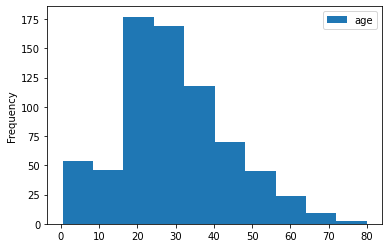

In [16]:
pd.DataFrame(df.age).plot.hist();

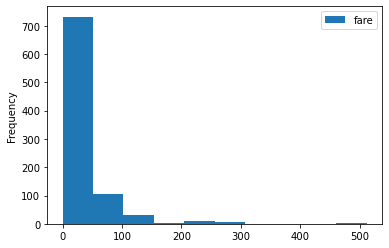

In [17]:
pd.DataFrame(df.fare).plot.hist();


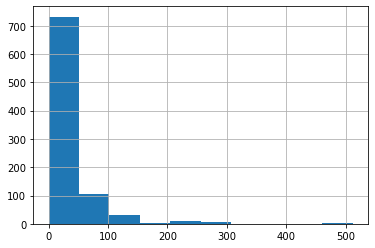

In [18]:
df.fare.hist(bins=10);

In [12]:
from scipy.stats import normaltest
test_value,p_value=normaltest(df.fare)
p_value

### since the p_value is bigger than 0.05, it has not normal distribution 

3.727091062842147e-197

In [20]:
test_value,p_value=normaltest(df.age.dropna())
p_value

### since the p_value is less than 0.05, it has not normal distribution

0.00011709599657350757

# H0 hipotezi Titanik kazasında insanlarin sosyo ekonomik siniflari hayatta kalma oranlarına herhangi bir etkisi yoktur
# H1 hipotezi Titanik kazasında insanlarin sosyo ekonomik siniflari hayatta kalma oranlarına herhangi bir etkisi vardır.


In [21]:
df.pclass.head(10)
# df.survived.head(10)


0    3
1    1
2    3
3    1
4    3
5    3
6    1
7    3
8    3
9    2
Name: pclass, dtype: int64

In [13]:
data = pd.get_dummies(df.pclass, prefix='pclass')
data.head()

,pclass_1,pclass_2,pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [14]:
df = df.join(data)
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone,First,Second,Third,pclass_1,pclass_2,pclass_3
0,0,3,male,22.0,1,0,7.2500,S,man,True,NaN,Southampton,no,False,0,0,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,woman,False,C,Cherbourg,yes,False,1,0,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,woman,False,NaN,Southampton,yes,True,0,0,1,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,woman,False,C,Southampton,yes,False,1,0,0,1,0,0
4,0,3,male,35.0,0,0,8.0500,S,man,True,NaN,Southampton,no,True,0,0,1,0,0,1


In [24]:
# df.plot.scatter("survived","pclass_1");
test_value,p_value=normaltest(df.survived.dropna())
p_value

0.0

In [25]:
from scipy.stats import stats
stats.spearmanr(df["survived"],df["pclass"])
test_istatistigi, pvalue = stats.spearmanr(df["survived"],df["pclass"])
print('Korelasyon Katsayısı = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

# since both values are not normally distributed, spearman test is used. results indicates poor correlation.

Korelasyon Katsayısı = -0.3397, p-değeri = 0.0000


In [26]:
from scipy.stats import stats
stats.spearmanr(df["survived"],df["pclass_1"])
test_istatistigi, pvalue = stats.spearmanr(df["survived"],df["pclass_1"])
print('Korelasyon Katsayısı = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))


Korelasyon Katsayısı = 0.2859, p-değeri = 0.0000


In [27]:
from scipy.stats import stats
stats.spearmanr(df["survived"],df["pclass_2"])
test_istatistigi, pvalue = stats.spearmanr(df["survived"],df["pclass_2"])
print('Korelasyon Katsayısı = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))


Korelasyon Katsayısı = 0.0933, p-değeri = 0.0053


In [28]:
from scipy.stats import stats
stats.spearmanr(df["survived"],df["pclass_3"])
test_istatistigi, pvalue = stats.spearmanr(df["survived"],df["pclass_3"])
print('Korelasyon Katsayısı = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))


Korelasyon Katsayısı = -0.3223, p-değeri = 0.0000


In [29]:
df.corr()

,survived,pclass,sex,age,sibsp,parch,fare,class,adult_male,alone,0,1,2,pclass_1,pclass_2,pclass_3
survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.338481,-0.557080,-0.203367,0.285904,0.093349,-0.322308,0.285904,0.093349,-0.322308
pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,1.000000,0.094035,0.135207,-0.885924,-0.188432,0.916673,-0.885924,-0.188432,0.916673
sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.131900,0.908578,0.303646,-0.098013,-0.064746,0.137143,-0.098013,-0.064746,0.137143
age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.369226,0.280328,0.198270,0.348941,0.006954,-0.312271,0.348941,0.006954,-0.312271
sibsp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,0.083081,-0.253586,-0.584471,-0.054582,-0.055932,0.092548,-0.054582,-0.055932,0.092548
parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,0.018443,-0.349943,-0.583398,-0.017633,-0.000734,0.015790,-0.017633,-0.000734,0.015790
fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,-0.549500,-0.182024,-0.271832,0.591711,-0.118557,-0.413333,0.591711,-0.118557,-0.413333
class,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,1.000000,0.094035,0.135207,-0.885924,-0.188432,0.916673,-0.885924,-0.188432,0.916673
adult_male,-0.557080,0.094035,0.908578,0.280328,-0.253586,-0.349943,-0.182024,0.094035,1.000000,0.404744,-0.059844,-0.067400,0.106416,-0.059844,-0.067400,0.106416
alone,-0.203367,0.135207,0.303646,0.198270,-0.584471,-0.583398,-0.271832,0.135207,0.404744,1.000000,-0.113364,-0.039070,0.129472,-0.113364,-0.039070,0.129472


In [ ]:
## this question confused me. i am not sure which test to use.